### 군집화의 개념과 비지도 학습


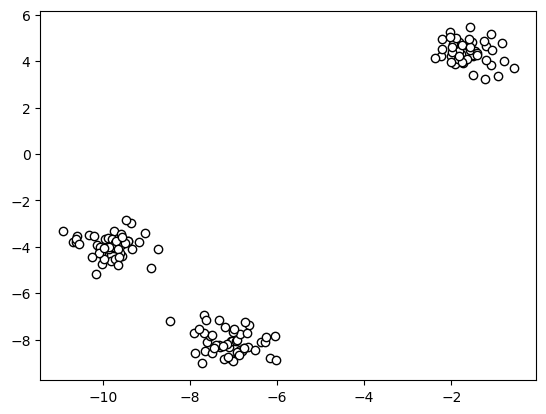

In [4]:
from sklearn.datasets import make_blobs

X,y= make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=1)

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X[:,0],X[:,1], c='white',edgecolor='black')
plt.show()

#실제 비지도 학습에서는 y를 모르는 상태이다.
#군집화(clusting): 비슷한 애들끼리 군집으로 묶어라.

In [14]:
#k-평균 알고리즘?

from sklearn.cluster import KMeans

km=KMeans(n_clusters=3, init='random',n_init=1, max_iter=300, random_state=0)#k값이 됨 #init 초기화.초기값/ max_iter 최대 반복수

km.fit(X) #비지도 학습이라 y가 없다.

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3, n_init=1, random_state=0)

In [15]:
#예측하기
p=km.predict(X)
p

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 2,
       2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1,
       0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0,
       0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 1, 1])

In [16]:
#클러스터 1,2,3에 대한 센터의 좌표값
km.cluster_centers_

array([[-7.0951497 , -8.1114237 ],
       [-9.8394448 , -3.96236399],
       [-1.6114244 ,  4.41658512]])

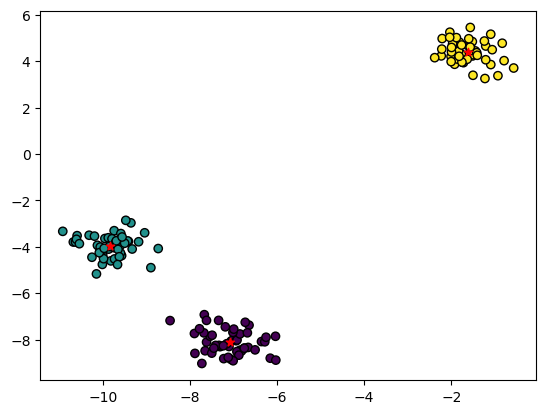

In [17]:
#c에다가 예측 결과 넣기
centers=km.cluster_centers_

plt.figure()
plt.scatter(X[:,0],X[:,1], c=p,edgecolor='black')
plt.scatter(centers[:,0],centers[:,1], c='red', marker='*')
plt.show()

*실루엣 계수/ 그래프

*a=응집력: 응집력은 작으면 작을 수록 좋다.

*b=분리도: 떨어져 있을 수록 좋다.
분리도는 크면 클 수록 좋다.

이상적인 값은 1이다.
최고값은 1 최저값은 -1이다.
-1~1 사이의 값을 갖는다.


In [53]:
from sklearn.metrics import silhouette_samples, silhouette_score

vals = silhouette_samples(X, p, metric='euclidean')
sil_score = silhouette_score(X, p, metric='euclidean')

In [54]:
sil_score

0.8603266510756534

In [33]:
vals

array([0.82447009, 0.86395151, 0.86087004, 0.84799083, 0.78358984,
       0.78383282, 0.87629415, 0.86152505, 0.81882365, 0.82467507,
       0.8623939 , 0.86021045, 0.88174333, 0.77314056, 0.92037415,
       0.61114555, 0.88260641, 0.84412424, 0.87889719, 0.94409822,
       0.79061774, 0.9200492 , 0.95005798, 0.95000623, 0.83210003,
       0.94888995, 0.93655027, 0.81404455, 0.95053745, 0.72053239,
       0.50376047, 0.83426847, 0.84976583, 0.95092923, 0.87054743,
       0.94065837, 0.85536392, 0.95005897, 0.91202217, 0.86776175,
       0.94546803, 0.85887058, 0.85694835, 0.71675027, 0.77345299,
       0.8771352 , 0.82239212, 0.91439335, 0.86707678, 0.82742171,
       0.88017122, 0.94736692, 0.94912651, 0.74730229, 0.87524502,
       0.83668074, 0.9527582 , 0.92648344, 0.94996537, 0.81913035,
       0.75355936, 0.94460599, 0.86634321, 0.85425111, 0.86430353,
       0.83194767, 0.87776737, 0.77937905, 0.86929744, 0.88415976,
       0.8286284 , 0.68289293, 0.85726408, 0.88664182, 0.77999

In [34]:
X.shape

(150, 2)

np.unique(p) #예측결과

plt.figure()

for i in range(3):

In [40]:
import numpy as np
labels=np.unique(p) 

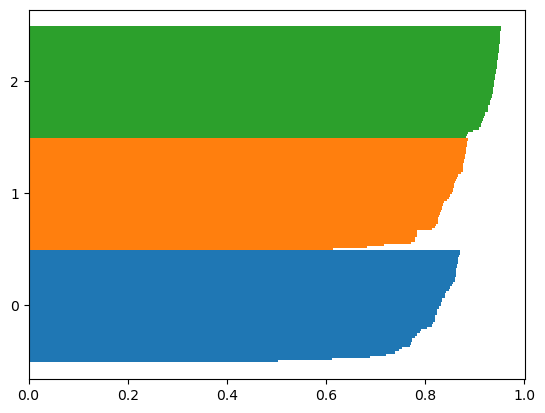

In [46]:
plt.figure()

y_low = 0
y_high= 0
y_ticks=[]
for i in labels:
    
    ivals= vals[p==i]
    ivals.sort()
    y_high += len(ivals) #막대 그래프 막대 갯수 세고 숫자 찾기
    plt.barh(range(y_low, y_high),ivals,height=1,edgecolor='none')
    y_ticks.append((y_low+y_high)/2)
    y_low=y_high
plt.yticks(y_ticks, labels)
plt.show()
    
#sort하면 자기 자신이 소팅되고 sorted하면 소팅한 결과가 나온다.

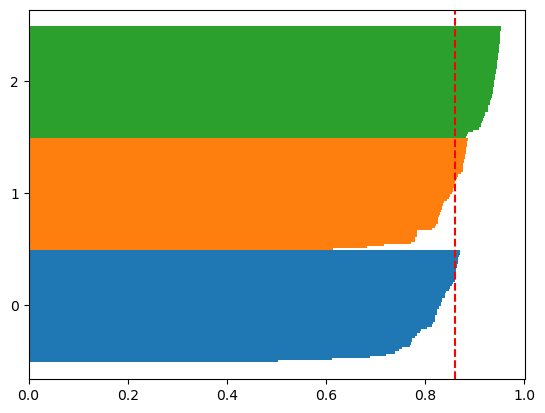

In [55]:
plt.figure()

y_low = 0
y_high= 0
y_ticks=[]
for i in labels:
    
    ivals= vals[p==i]
    ivals.sort()
    y_high += len(ivals) #막대 그래프 막대 갯수 세고 숫자 찾기
    plt.barh(range(y_low, y_high),ivals,height=1,edgecolor='none')
    y_ticks.append((y_low+y_high)/2)
    y_low=y_high
    
#빨간 라인 긋기   
plt.axvline(sil_score,color='red', linestyle='--')  #버티컬 라인
plt.yticks(y_ticks, labels)
plt.show()

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


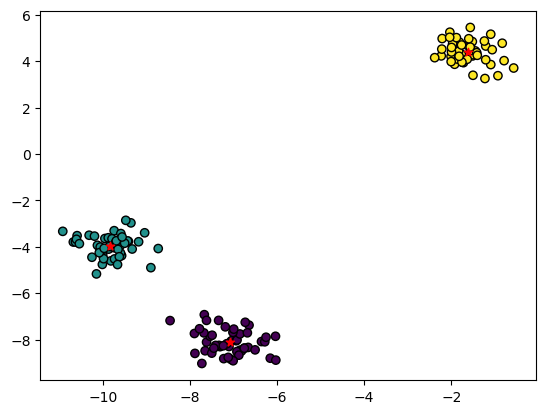

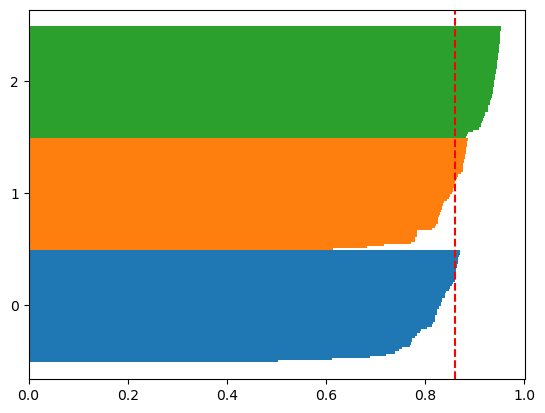

In [63]:
# 모델 생성/학습
km = KMeans(n_clusters=3, init='random', max_iter=300, n_init=1, random_state=0) # 값 ,# init=초기값 # 최대 반복수
km.fit(X)
p = km.predict(X)

#모델 군진화 결과 시각화
centers = km.cluster_centers_
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=p, edgecolors='black')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*')
plt.show()

# 실루엣 그래프 시각화
vals = silhouette_samples(X, p, metric='euclidean')
sil_core =  silhouette_score(X, p, metric='euclidean')
labels = np.unique(p)

# 실루엣 그래프 바그래프로 그리기
plt.figure()

y_low = 0
y_high = 0
y_ticks = []
for i in labels:
    ivals = vals[p == i]
    ivals.sort()
    y_high += len(ivals)
    plt.barh(range(y_low, y_high), ivals, height=1, edgecolor='none') # 바에 h를 붙이면 가로로 된다.
    y_ticks.append((y_low+y_high)/2)
    y_low = y_high
plt.axvline(sil_core, color='red', linestyle='--')
plt.yticks(y_ticks, labels)
plt.show()

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


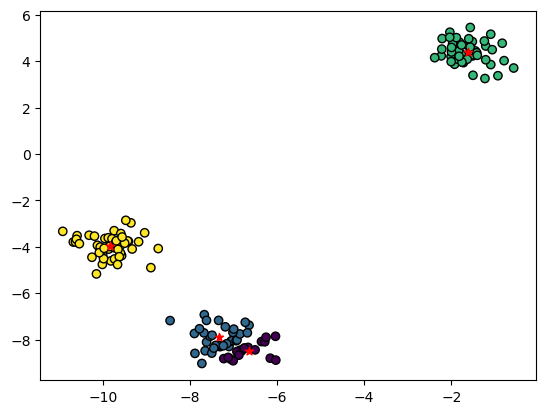

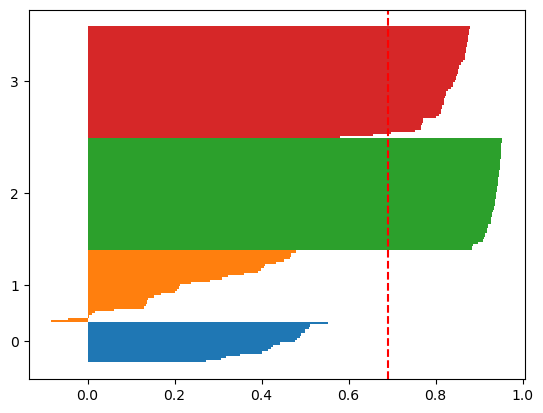

In [62]:
# 모델 생성/학습
km = KMeans(n_clusters=4, init='random', max_iter=300, n_init=1, random_state=0) # 값 ,# init=초기값 # 최대 반복수
km.fit(X)
p = km.predict(X)

#모델 군진화 결과 시각화
centers = km.cluster_centers_
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=p, edgecolors='black')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*')
plt.show()

# 실루엣 그래프 시각화
vals = silhouette_samples(X, p, metric='euclidean')
sil_core =  silhouette_score(X, p, metric='euclidean')
labels = np.unique(p)

# 실루엣 그래프 바그래프로 그리기
plt.figure()

y_low = 0
y_high = 0
y_ticks = []
for i in labels:
    ivals = vals[p == i]
    ivals.sort()
    y_high += len(ivals)
    plt.barh(range(y_low, y_high), ivals, height=1, edgecolor='none') # 바에 h를 붙이면 가로로 된다.
    y_ticks.append((y_low+y_high)/2)
    y_low = y_high
plt.axvline(sil_core, color='red', linestyle='--')
plt.yticks(y_ticks, labels)
plt.show()

In [ ]:
#tol=허용오차/공차
#DBscan? 비선형 모델을 해결하기 위해 나옴.

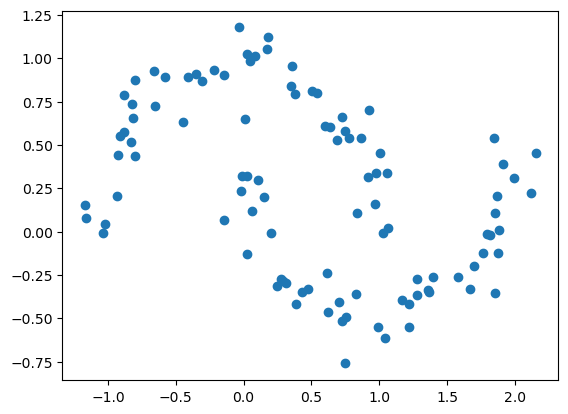

In [65]:
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100, noise=0.1,random_state=1)

plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.show()

In [81]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=5,metric='euclidean')
db.fit_predict(X)
p=db.fit_predict(X)  #DBSCAN은 predict가 단독으로 불가능함.

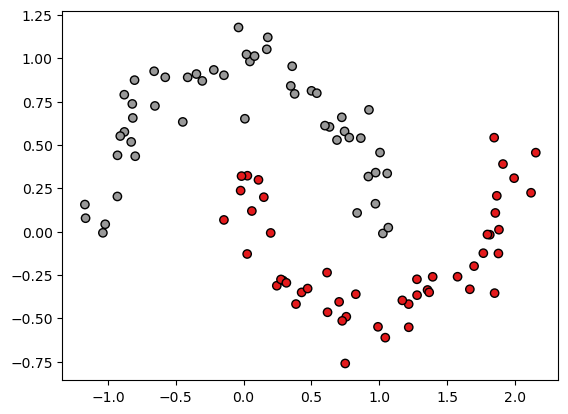

In [82]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=p, edgecolors='black', cmap='Set1')
plt.show()

In [77]:
p  #마이너스 라벨은 아무곳에도 포함되지 못한 노이즈임.

array([ 0,  3, -1,  0, -1,  7,  4,  0,  1,  2,  3,  4,  5,  5,  5,  6,  6,
        4,  0,  7,  7,  1,  3,  2,  7,  4,  3,  6,  9,  4,  1, -1, -1,  3,
        3,  4,  9, -1,  8, -1,  3,  5,  0,  7,  0,  4,  9,  3,  8, -1,  4,
        5,  8,  7,  5,  9,  7, -1,  7, -1,  6,  2,  1,  4,  9,  3,  7,  2,
        7,  3,  5,  8,  2,  2,  7,  3,  7,  1,  0,  7,  6,  6,  7,  7,  8,
       -1,  8,  7,  1,  0,  7,  7,  2,  0,  7,  0,  7, -1,  7,  4],
      dtype=int64)

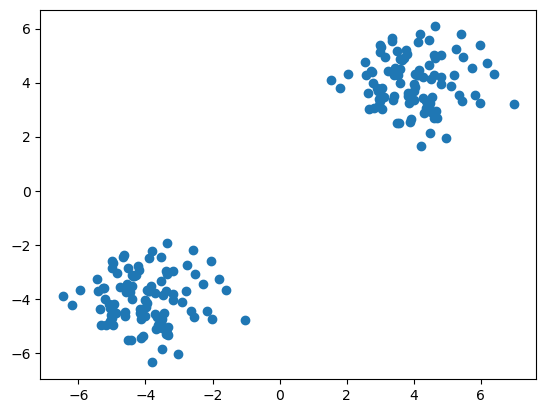

In [85]:
X = np.random.randn(100,2) #50개씩 두 덩어리
X=np.r_[X+4,X-4]

plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.show()

In [96]:
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(gamma=0.1, nu=0.1, kernel='rbf')
ocsvm.fit(X)
# ocsvm.predict()


OneClassSVM(gamma=0.1, nu=0.1)

In [97]:
def plot_ocsvm_regions(X, classifier, resolution=0.02):
        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution))
        #print(xx1)
        #print(xx2)
        #print(np.array([xx1.ravel(), xx2.ravel()]).T)

        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.4)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())


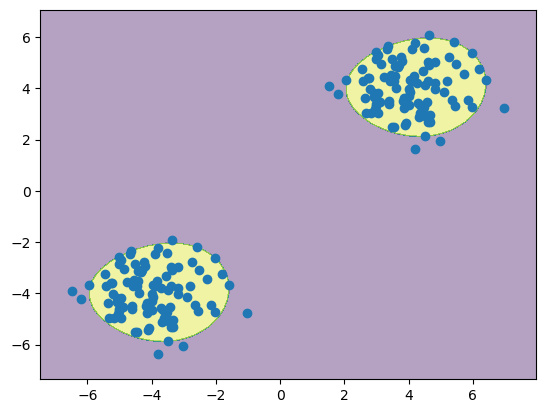

In [98]:
plot_ocsvm_regions(X, ocsvm)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [111]:
def plot_ocsvm_regions_subplot(X, classifier, ax, resolution=0.02):
        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution))
        #print(xx1)
        #print(xx2)
        #print(np.array([xx1.ravel(), xx2.ravel()]).T)

        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        ax.contourf(xx1, xx2, Z, alpha=0.4)
        ax.set_xlim(xx1.min(), xx1.max())
        ax.set_ylim(xx2.min(), xx2.max())

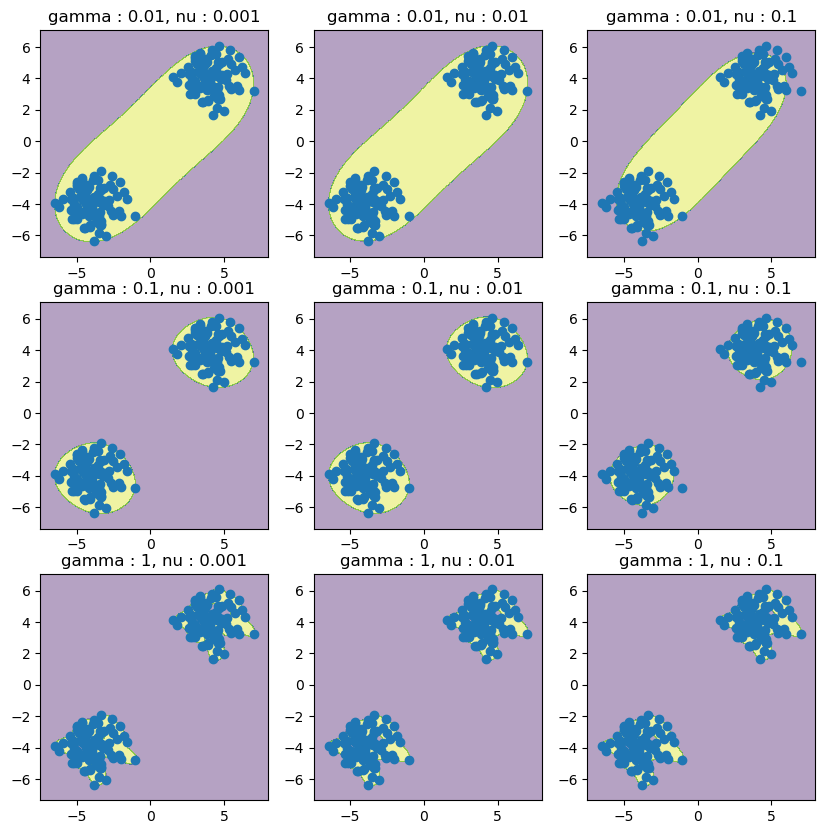

In [115]:
fig, axes = plt.subplots(3, 3, figsize=(10,10))
for i,gamma in enumerate([0.01, 0.1, 1]):
    for j,nu in enumerate([0.001, 0.01, 0.1]):
        ocsvm = OneClassSVM(gamma=gamma, nu=nu, kernel='rbf')
        ocsvm.fit(X)
        plot_ocsvm_regions_subplot(X, ocsvm, ax=axes[i][j])
        axes[i][j].scatter(X[:,0],X[:,1])
        axes[i][j].set_title(f"gamma : {gamma}, nu : {nu}")
plt.show()

#gamma가 크면 클 수록 모델의 복잡도가 높아진다. 감마는 과대적합을 조정할 수 있다.
#nu는 원래 데이터에서 이상치가 얼마나 있는지. 데이터의 신뢰도를 말함.